# **Class Assignment: Polynomials and Interactions (20 points)**

#### **Meg Bucich**


<br>

We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  

####<font color=red>Task 1 - Polynomial Regression</font>

1. We are interested in investigating the relationship between miles per gallon `mpg` (seconds) as our response and engine displacement `disp` (cubic inches) as our predictor using linear regression.

  As always, we should plot our data before running our regressions!

  * Plot a scatterplot with `disp` on the x-axis and  `mpg` on the y-axis. What are your observations? Is the relationships linear? quadratic? Is there no relationship? Explain your answer in complete sentences.

2. Fit a qudratic trend using a linear regression using the following script. The `I()` syntax allows you to include polynomial terms.
```
fit2 <- lm(mpg ~ disp + I(disp^2), data = mtcars)
```
Summarize the regression. What are you conclusions? Is the quadratic term significant? Are you able to easily interpret the coefficients?

3. Test the quadratic term using the ANOVA F-test. That is, your reduced model should be a linear trend between `mpg` and `disp`. What are your conclusions? Is the quadratic fit significantly better than the linear fit?

4. Repeat this analysis for higher degree polynomials (i.e. fit a cubic and compare to the quadratic using the ANOVA F-test, etc.).

  What is your final model? Write down your final model in equation form. Compare your answer with your classmates/colleagues.

5. It can be damn near impossible to interpret polynomial coefficients with degree $\ge 3$. It is common to assess your polynomial regression fits visually.  Run the script below to visualize your regression fit with confidence bands. Does the model specification appear to be a good fit?

  ```
  # define your final model here
  final_model <- ...

  # creates a dataframe to predict various displacement values
  newdata <- data.frame(disp = seq(min(mtcars$disp), max(mtcars$disp), 1))

  # predicts values from final_model using displacement values
  preds   <- predict(final_model, newdata = newdata, interval = "confidence")

  # plots scatterplot
  plot(mtcars$disp, mtcars$mpg,
      xlab = "Engine Displacement",
      ylab = "Miles per Gallon")
  # plot predictions from regression
  lines(newdata$disp, preds[,1], lwd = 2, col = "blue")
  lines(newdata$disp, preds[,2], lwd = 2, col = "blue", lty = 2)
  lines(newdata$disp, preds[,3], lwd = 2, col = "blue", lty = 2)
  ```


6. Optional: The code below overlays the different polynomial fits for visual comparison.
  ```
plot_poly <- function(final_model) {
  # create a dataframe to predict various displacement values
  newdata <- data.frame(disp = seq(min(mtcars$disp), max(mtcars$disp), 1))
  # predict values from final_model using displacement values
  preds   <- predict(final_model, newdata = newdata, interval = "confidence")
  return(preds)
}
```
```
# enter your models here to view the several polynomial fits
fit1 <- lm(mpg ~ disp, data = mtcars)
fit2 <- ...
fit3 <- ...
fit4 <- ...
fit5 <- ...
```
```
preds1 <- plot_poly(fit1)
preds2 <- plot_poly(fit2)
preds3 <- plot_poly(fit3)
preds4 <- plot_poly(fit4)
preds5 <- plot_poly(fit5)
```
```
# plot scatterplot
plot(mtcars$disp, mtcars$mpg,
    xlab = "Engine Displacement",
    ylab = "Miles per Gallon")
# plot predictions from regression
lines(newdata$disp, preds1[,1], lwd = 2, col = 1)
lines(newdata$disp, preds2[,1], lwd = 2, col = 2)
lines(newdata$disp, preds3[,1], lwd = 2, col = 3)
lines(newdata$disp, preds4[,1], lwd = 2, col = 4)
lines(newdata$disp, preds5[,1], lwd = 2, col = 5)
legend("topright", paste("d =", 1:5), col = 1:5, lty = 1, lwd = 2)
```

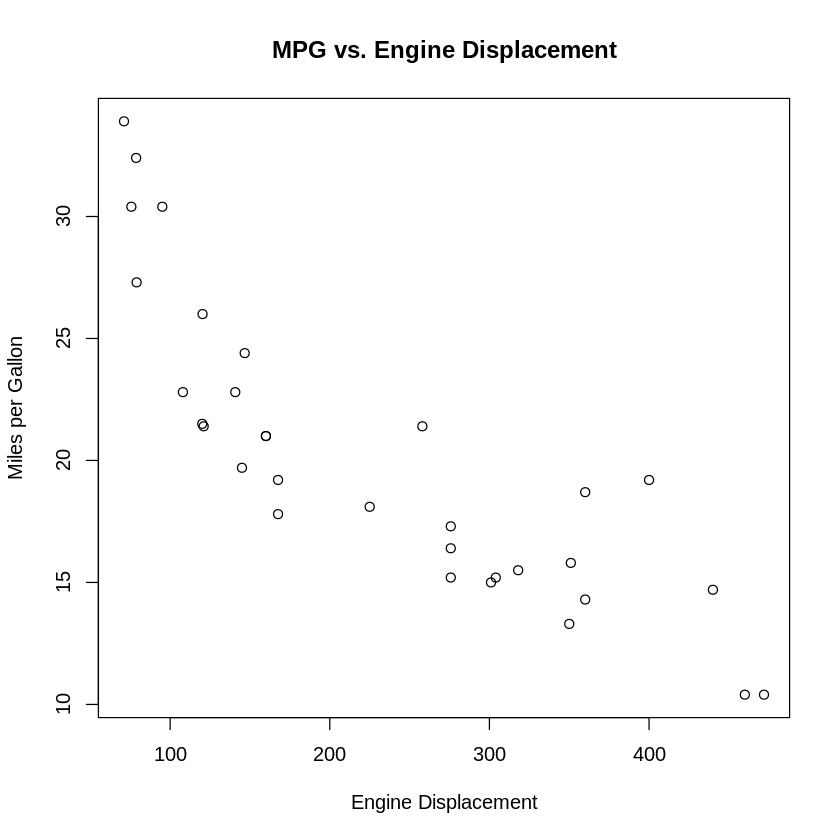

In [1]:
#1 disp (x) and mpg (y)
disp = mtcars$disp
mpg = mtcars$mpg
plot(disp,mpg, xlab = "Engine Displacement", ylab = "Miles per Gallon", main = "MPG vs. Engine Displacement")

In [3]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


the relationship between mpg and disp is negative but its unclear if the realtionship is linear or quadratic just from looking at the plot.

In [3]:
#2
fit2 = lm(mpg ~ disp + I(disp^2), data = mtcars)
summary(fit2)


Call:
lm(formula = mpg ~ disp + I(disp^2), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
I(disp^2)    1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10


**Summarize the regression. What are you conclusions? Is the quadratic term significant? Are you able to easily interpret the coefficients?**

$\beta_{1}$ and $\beta_{2}$ are both significant at the 95% level as they have p-values less than .05. This means both the linear term and the quadratic term are significant and we should keep them in the model. Even if $\beta_{1}$ was not significant and $\beta_{2}$ was, we would still keep both terms because we keep all lower coefficient terms.

In [5]:
#3
fit_reduced = lm(mpg ~ disp, data = mtcars) #linear fit
anova(fit_reduced, fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,317.1587,NA,NA,NA,NA
2,29,233.3932,1,83.76552,10.40819,0.003103547


**What are your conclusions? Is the quadratic fit significantly better than the linear fit?**

The SSE for the full model is 233.4 and the SSE for the reduced model is 317.15. This means that there is less variation explained by the regression when we do not include the quadratic term in the model. Therefore, a quadratiuc fit is better than a linear fit. Significantly better is unclear becuase the quadratric term only reduced the SSE by about 80. If we say that a reduction by 80 is sufficiently large, then yes the quadratic fit is **significantly** better than the linear fit.

In [8]:
#4
fit2 = lm(mpg ~ disp + I(disp^2), data = mtcars) #quadratic fit
fit3 = lm(mpg ~ disp + I(disp^2) + I(disp^3), data = mtcars) #cubic fit
anova(fit2, fit3)
summary(fit2)
summary(fit3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,233.3932,NA,NA,NA,NA
2,28,138.4360,1,94.95722,19.20601,0.0001495866



Call:
lm(formula = mpg ~ disp + I(disp^2), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
I(disp^2)    1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10



Call:
lm(formula = mpg ~ disp + I(disp^2) + I(disp^3), data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0896 -1.5653 -0.3619  1.4368  4.7617 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.070e+01  3.809e+00  13.310 1.25e-13 ***
disp        -3.372e-01  5.526e-02  -6.102 1.39e-06 ***
I(disp^2)    1.109e-03  2.265e-04   4.897 3.68e-05 ***
I(disp^3)   -1.217e-06  2.776e-07  -4.382  0.00015 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.224 on 28 degrees of freedom
Multiple R-squared:  0.8771,	Adjusted R-squared:  0.8639 
F-statistic: 66.58 on 3 and 28 DF,  p-value: 7.347e-13


the ANOVA test between a cubic and quadratic fit yield a larger SSE score for the quadraic model than the cubic. This means the cubic model regression explains more of the regession compared to the errot term than the quadratic model does.

**Final Model:**
$$
\hat{y} = 50.70 - 0.3372\,(\text{disp}) + 0.001109\,(\text{disp}^2) - 0.000001217\,(\text{disp}^3)
$$



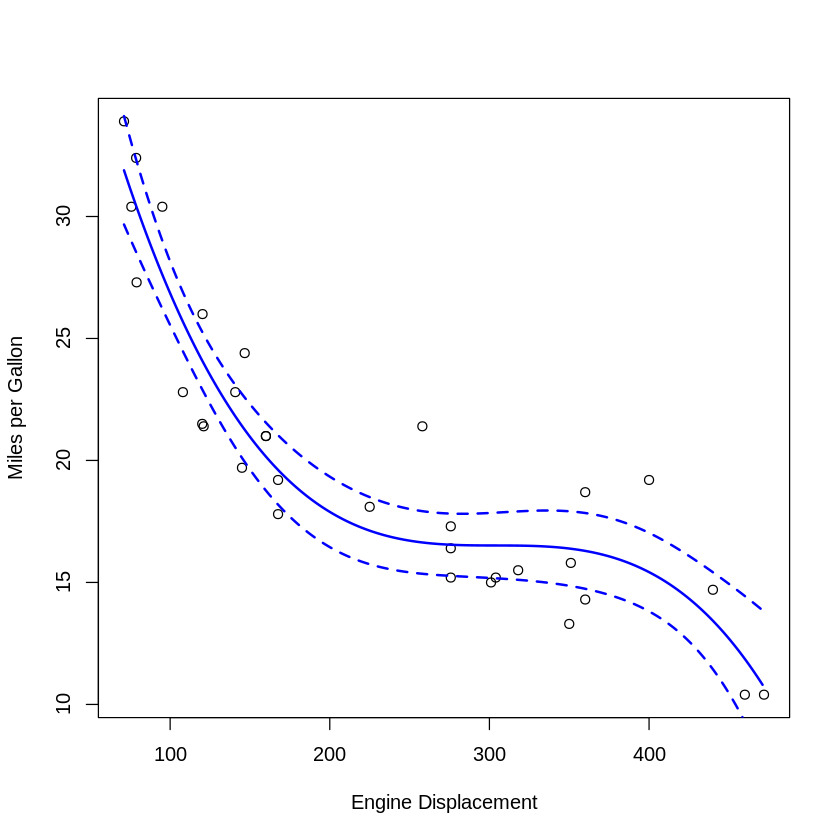

In [12]:
#5
# define your final model here
final_model = lm(mpg ~ disp + I(disp^2) + I(disp^3), data = mtcars)

# creates a dataframe to predict various displacement values
newdata = data.frame(disp = seq(min(mtcars$disp), max(mtcars$disp), 1))

# predicts values from final_model using displacement values
preds =  predict(final_model, newdata = newdata, interval = "confidence")


plot(disp, mpg,xlab = "Engine Displacement",ylab = "Miles per Gallon")
# plot predictions from regression
lines(newdata$disp, preds[,1], lwd = 2, col = "blue")
lines(newdata$disp, preds[,2], lwd = 2, col = "blue", lty = 2)
lines(newdata$disp, preds[,3], lwd = 2, col = "blue", lty = 2)

**Does the model specification appear to be a good fit?**

yes, the cubic function seems to be a very good fit to represent the relationship between miles per gallon and engine displacement. Of course we have a few outliers for larger values of engine displacement but that is expected for any model fit.

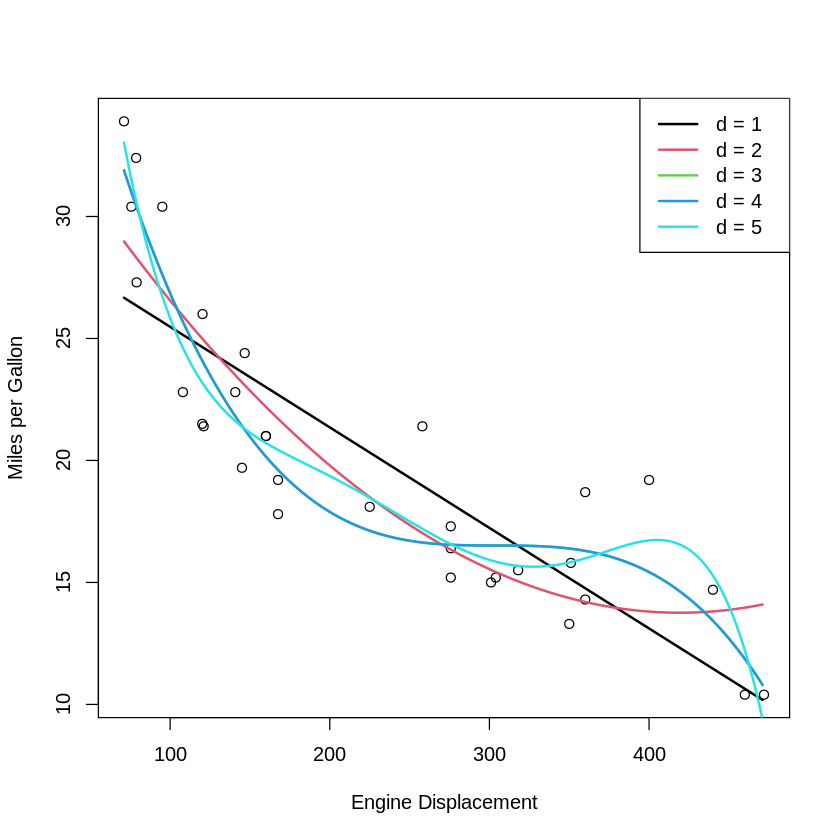

In [4]:
#6 see the overall of the different model fits

disp = mtcars$disp
mpg = mtcars$mpg

# create a dataframe to predict various displacement values
newdata = data.frame(disp = seq(min(mtcars$disp), max(mtcars$disp), 1))

plot_poly <- function(final_model) {
# predict values from final_model using displacement values
preds = predict(final_model, newdata = newdata, interval = "confidence")
return(preds)
}

fit1 = lm(mpg ~ disp, data = mtcars)
fit2 = lm(mpg ~ disp + I(disp^2), data = mtcars)
fit3 = lm(mpg ~ disp + I(disp^2) + I(disp^3), data = mtcars)
fit4 = lm(mpg ~ disp + I(disp^2) + I(disp^3) + I(disp^4), data = mtcars)
fit5 = lm(mpg ~ disp + I(disp^2) + I(disp^3) + I(disp^4) + I(disp^5), data = mtcars)

preds1 <- plot_poly(fit1)
preds2 <- plot_poly(fit2)
preds3 <- plot_poly(fit3)
preds4 <- plot_poly(fit4)
preds5 <- plot_poly(fit5)

# plot scatterplot
plot(disp, mpg,xlab = "Engine Displacement",ylab = "Miles per Gallon")
# plot predictions from regression
lines(newdata$disp, preds1[,1], lwd = 2, col = 1)
lines(newdata$disp, preds2[,1], lwd = 2, col = 2)
lines(newdata$disp, preds3[,1], lwd = 2, col = 3)
lines(newdata$disp, preds4[,1], lwd = 2, col = 4)
lines(newdata$disp, preds5[,1], lwd = 2, col = 5)
legend("topright", paste("d =", 1:5), col = 1:5, lty = 1, lwd = 2)

<br>

---

<br>






####<font color=red>Task 2 - Interactions: Continuous with Categorical</font>

1. We are interested in investigating the relationship between miles per gallon `mpg` (seconds) as our response and quarter mile time `qsec` (seconds) and number of cylinders `cyl` as our predictors.

  Plot the appropriate plots to determine the proper functional relationships between `mpg` and the two predictors. You can convert the variable `cyl` into a factor using the following script.
  ```
  mtcars$cyl <- factor(mtcars$cyl)
  ```

2. We believe there may be an interaction between quarter mile time and the number of cylinders of a vehicle. Fit a regression to determine if there is an interaction effect using the script below. Note the colon "`:`" is R syntax for the inclusion of an interaction.
```
fit_interaction <- lm(mpg ~ qsec + cyl + qsec:cyl, data = mtcars)
```

3. Using ANOVA, determine if the interaction between `qsec` and `cyl` is significant. Hint: The reduced model simply removes `qsec:cyl`. What is your conclusion?

4. If the interaction were significant, what would be your conclusion? Answer the question in the context of linear relationships between `mpg` and `qsec` for each unique value of `cyl`.

5. Given our conclusion, now fit another regression without the interaction. Are both `qsec` and `cyl` significant? Remove the variable that is not significant; this is your final model. Summarize and interpret.



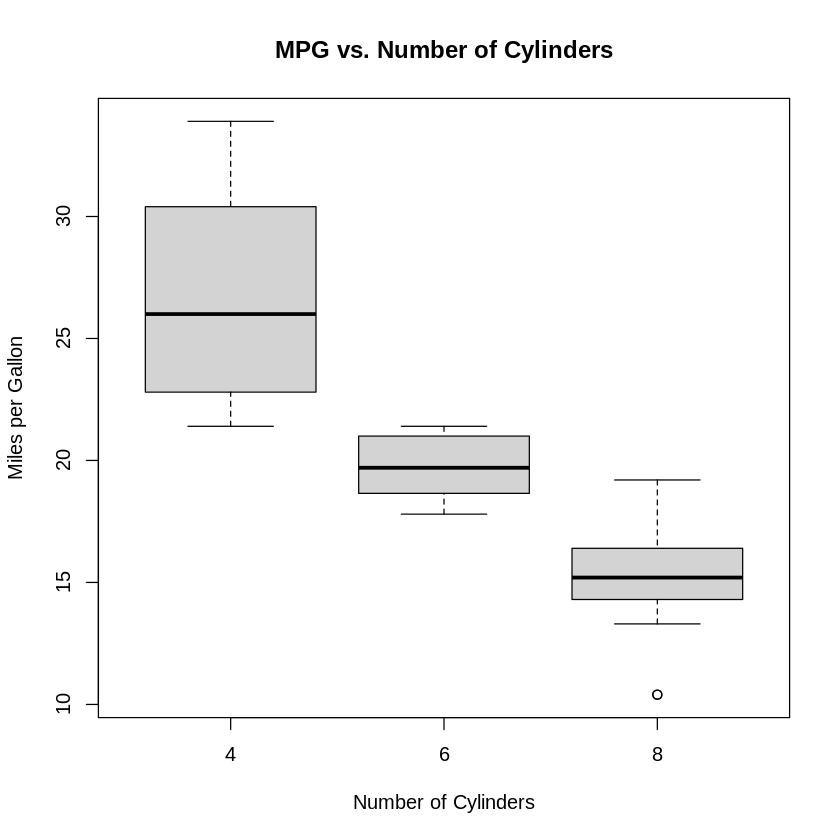

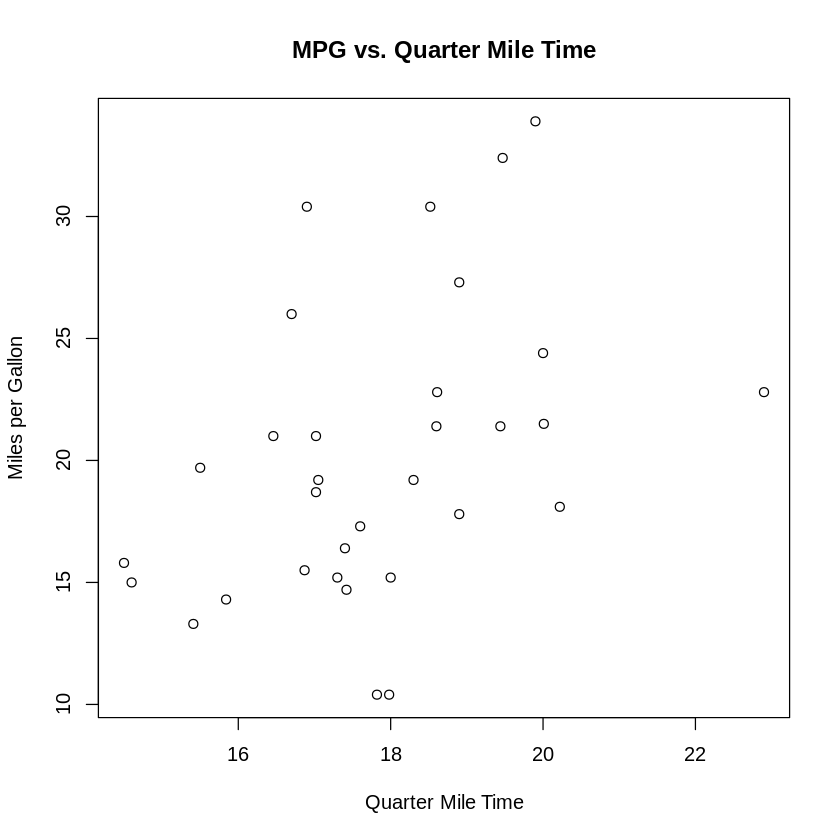

In [20]:
cyl = mtcars$cyl #x1
qsec = mtcars$qsec #x2
mpg = mtcars$mpg #y
cyl = as.factor(cyl)

plot(cyl,mpg, xlab = "Number of Cylinders", ylab = "Miles per Gallon", main = "MPG vs. Number of Cylinders")
plot(qsec,mpg, xlab = "Quarter Mile Time", ylab = "Miles per Gallon", main = "MPG vs. Quarter Mile Time")

In [19]:
#2
cyl = mtcars$cyl #x1
qsec = mtcars$qsec #x2
mpg = mtcars$mpg #y
mtcars$cyl = as.factor(cyl)

fit_interaction = lm(mpg ~ qsec + cyl + qsec:cyl, data = mtcars) #qsec:cyl is the interaction term between our two predictor variables
summary(fit_interaction)


Call:
lm(formula = mpg ~ qsec + cyl + qsec:cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6035 -1.6398 -0.0314  1.6249  7.7188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  38.7676    11.9882   3.234  0.00331 **
qsec         -0.6325     0.6242  -1.013  0.32030   
cyl6        -12.6144    18.6875  -0.675  0.50562   
cyl8        -19.9218    17.6455  -1.129  0.26921   
qsec:cyl6     0.2759     1.0103   0.273  0.78694   
qsec:cyl8     0.4091     0.9914   0.413  0.68321   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.321 on 26 degrees of freedom
Multiple R-squared:  0.7453,	Adjusted R-squared:  0.6963 
F-statistic: 15.22 on 5 and 26 DF,  p-value: 5.12e-07


Right away we can see here that the **interaction terms** are **not significant** because they have large p-values

In [35]:
#3
fit_interaction = lm(mpg ~ qsec + cyl + qsec:cyl, data = mtcars) #has interaction term
fit = lm(mpg ~ qsec + cyl, data = mtcars) #no interaction term
anova(fit, fit_interaction)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,288.8325,NA,NA,NA,NA
2,26,286.7892,2,2.043316,0.09262241,0.911837


The SSE is almost identical for both models. This means that the introduction of an interaction term does not really help decrease any variation explained by the error term and probably shouldn't be included in the model.

In [ ]:
#4

**If the interaction were significant, what would be your conclusion? Answer the question in the context of linear relationships between mpg and qsec for each unique value of cyl**

When an interaction term is significant in a linear model, it represents the change in slope for the continuous variable across the categories of the discrete. In the model we have our reponse variable as miles per gallon and the predictors being quarter mile time (a continuous/quanitative varible) and number of cylinders (a discrete/qualitative vairable). If the interaction term was significant, it would mean that we see a change in the slope for quarter mile times between cars with different numbers of cylinders.

In [ ]:
#5

**Given our conclusion, now fit another regression without the interaction. Are both qsec and cyl significant? Remove the variable that is not significant; this is your final model. Summarize and interpret.**

In [23]:
fit_both = lm(mpg ~ qsec + cyl, data = mtcars)
fit_qsec = lm(mpg ~ qsec, data = mtcars)
fit_cyl = lm(mpg ~ cyl, data = mtcars)

**ANOVA testing qsec**

In [24]:
anova(fit_both,fit_qsec)
summary(fit_both)
summary(fit_qsec)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,288.8325,NA,NA,NA,NA
2,30,928.6553,-2,-639.8228,31.01285,7.926493e-08



Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4997 -1.7721 -0.2069  1.7569  7.5715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.0724     7.7212   4.542 9.68e-05 ***
qsec         -0.4394     0.4003  -1.098    0.282    
cyl6         -7.4305     1.6208  -4.584 8.63e-05 ***
cyl8        -12.6029     1.6034  -7.860 1.46e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.212 on 28 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.716 
F-statistic: 27.05 on 3 and 28 DF,  p-value: 2.017e-08



Call:
lm(formula = mpg ~ qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8760 -3.4539 -0.7203  2.2774 11.6491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5.1140    10.0295  -0.510   0.6139  
qsec          1.4121     0.5592   2.525   0.0171 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.564 on 30 degrees of freedom
Multiple R-squared:  0.1753,	Adjusted R-squared:  0.1478 
F-statistic: 6.377 on 1 and 30 DF,  p-value: 0.01708


The model with only qsec has a much higher SSE term. This means the model is better with cyl because more of the variation in the model is explained by the regression rather than the error term.

**ANOVA testing cyl**

In [25]:
anova(fit_both,fit_cyl)
summary(fit_both)
summary(fit_cyl)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,288.8325,NA,NA,NA,NA
2,29,301.2626,-1,-12.43012,1.205001,0.2816752



Call:
lm(formula = mpg ~ qsec + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4997 -1.7721 -0.2069  1.7569  7.5715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.0724     7.7212   4.542 9.68e-05 ***
qsec         -0.4394     0.4003  -1.098    0.282    
cyl6         -7.4305     1.6208  -4.584 8.63e-05 ***
cyl8        -12.6029     1.6034  -7.860 1.46e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.212 on 28 degrees of freedom
Multiple R-squared:  0.7435,	Adjusted R-squared:  0.716 
F-statistic: 27.05 on 3 and 28 DF,  p-value: 2.017e-08



Call:
lm(formula = mpg ~ cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6636     0.9718  27.437  < 2e-16 ***
cyl6         -6.9208     1.5583  -4.441 0.000119 ***
cyl8        -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


The model with only cyl has a very similar SSE term but it does have a higher SSE term.

**Final Model:**

$\hat y = 35.0724 - .4394qsec - 7.4305cyl_{6} - 12.6029cyl_{8}$

<br>

---

<br>






####<font color=red>Task 3 - Interactions: Continuous with Categorical</font>

1. Run the script below, which plots the regression fit from Task 2 ***WITHOUT*** the interaction between `qsec` and `cyl`.
  *   Are these lines (perfectly) parallel? Why/why not?
  *   Does the regression fit make sense? Why/why not?
```
options(repr.plot.width = 6.5, repr.plot.height = 6.5)
# fit regression WITHOUT interaction
fit <- lm(mpg ~ qsec + cyl, data = mtcars)
```
```
# make predictions for each value of cyl
newdata4 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "4"  )
newdata6 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "6"  )
newdata8 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "8"  )
```
```
preds4   <- predict(fit, newdata = newdata4)
preds6   <- predict(fit, newdata = newdata6)
preds8   <- predict(fit, newdata = newdata8)
```
```
# plot regression fits
plot(mtcars$qsec, mtcars$mpg, xlab = "Quarter Mile Time", ylab = "MPG")
lines(newdata4$qsec, preds4, lwd = 2, col = 1)
lines(newdata6$qsec, preds6, lwd = 2, col = 2)
lines(newdata8$qsec, preds8, lwd = 2, col = 3)
legend("topright", paste("cyl =", 1:3), lty = 1, lwd = 2, col = 1:3)
```

2. Run the script below, which plots the regression fit from Task 2 ***WITH*** the interaction between `qsec` and `cyl`.
  *   Are these lines (perfectly) parallel? Why/why not?
  *   Does the regression fit make sense? Why/why not?
```
options(repr.plot.width = 6.5, repr.plot.height = 6.5)
# fit regression WITHOUT interaction
fit <- lm(mpg ~ qsec + cyl + qsec:cyl, data = mtcars)
```
```
# make predictions for each value of cyl
newdata4 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "4"  )
newdata6 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "6"  )
newdata8 <- data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = "8"  )
```
```
preds4   <- predict(fit, newdata = newdata4)
preds6   <- predict(fit, newdata = newdata6)
preds8   <- predict(fit, newdata = newdata8)
```
```
# plot regression fits
plot(mtcars$qsec, mtcars$mpg, xlab = "Quarter Mile Time", ylab = "MPG")
lines(newdata4$qsec, preds4, lwd = 2, col = 1)
lines(newdata6$qsec, preds6, lwd = 2, col = 2)
lines(newdata8$qsec, preds8, lwd = 2, col = 3)
legend("topright", paste("cyl =", 1:3), lty = 1, lwd = 2, col = 1:3)
```


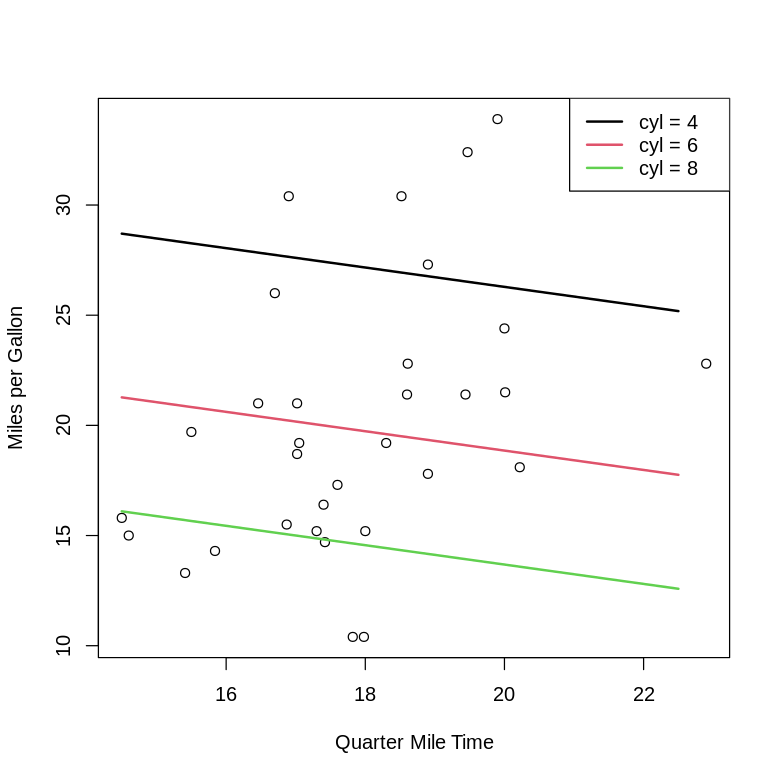

In [27]:
#1
cyl = factor(mtcars$cyl)
qsec = mtcars$qsec
mpg = mtcars$mpg


options(repr.plot.width = 6.5, repr.plot.height = 6.5)
fit = lm(mpg ~ qsec + cyl, data = mtcars) # fit regression WITHOUT interaction

newdata4 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("4", levels = levels(cyl)))
newdata6 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("6", levels = levels(cyl)))
newdata8 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("8", levels = levels(cyl)))

preds4  = predict(fit, newdata = newdata4)
preds6  = predict(fit, newdata = newdata6)
preds8  = predict(fit, newdata = newdata8)


plot(mtcars$qsec, mtcars$mpg, xlab = "Quarter Mile Time", ylab = "Miles per Gallon")
lines(newdata4$qsec, preds4, lwd = 2, col = 1)
lines(newdata6$qsec, preds6, lwd = 2, col = 2)
lines(newdata8$qsec, preds8, lwd = 2, col = 3)
legend("topright", paste("cyl =", c(4, 6, 8)), lty = 1, lwd = 2, col = 1:3)

**Are these lines (perfectly) parallel? Why/why not?**

These lines are perfectly parallel. When we have both a continuous and discrete variable, we see that each category will have the same slope but different intercepts. This is because the variable "cyl" is a dummy variable so it is either 1 or 0 (then multiplied by the coefficient). This does not affect the slope which is determined by the varible qsec.


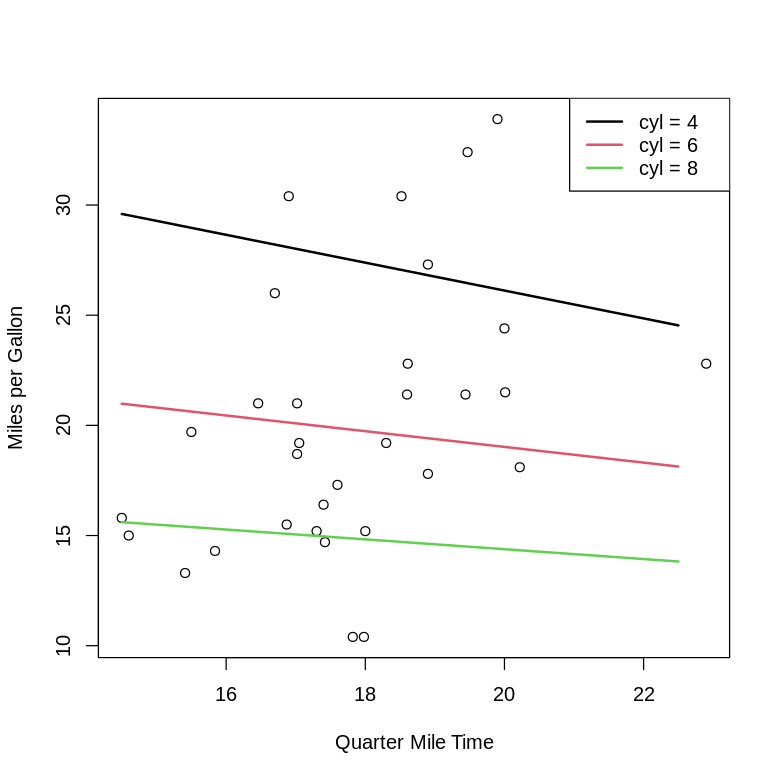

In [28]:
#2

qsec = mtcars$qsec
mpg = mtcars$mpg


options(repr.plot.width = 6.5, repr.plot.height = 6.5)
fit = lm(mpg ~ qsec + cyl + qsec:cyl, data = mtcars) # fit regression WITH interaction

newdata4 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("4", levels = levels(cyl)))
newdata6 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("6", levels = levels(cyl)))
newdata8 = data.frame(qsec = seq(min(mtcars$qsec), max(mtcars$qsec), 1), cyl  = factor("8", levels = levels(cyl)))


preds4  = predict(fit, newdata = newdata4)
preds6  = predict(fit, newdata = newdata6)
preds8  = predict(fit, newdata = newdata8)


plot(mtcars$qsec, mtcars$mpg, xlab = "Quarter Mile Time", ylab = "Miles per Gallon")
lines(newdata4$qsec, preds4, lwd = 2, col = 1)
lines(newdata6$qsec, preds6, lwd = 2, col = 2)
lines(newdata8$qsec, preds8, lwd = 2, col = 3)
legend("topright", paste("cyl =", c(4, 6, 8)), lty = 1, lwd = 2, col = 1:3)

**Are these lines (perfectly) parallel? Why/why not?**

No, they are not the perfectly parallel because the interaction term also effects the slope, not just the intercept. So all 3 lines have different slopes and intercepts.



<br>

---

<br>






####<font color=red>Task 4 - Categorical Interactions </font>

1. We are interested in investigating the relationship between miles per gallon `mpg` (seconds) as our response and the categorical predictors `cyl` and `am` for 0 = automatic or 1 = manual transmission.
  *   Convert both `cyl` and `am` to factors if not already completed
  *   Plot boxplots to visualize the relationships between `mpg` and the two predictors
  *   What are your observations?

2. Regress `mpg` on `cyl` and `am` with an interaction between `cyl` and `am`.
  * Write down the equation that represents this regression fit.
  * What is the interpretation of the intercept?
  * What is the average `mpg` for 6-cylinder cars with a manual transmission?

3. Use an ANOVA F-test to determine if the interaction is significant.

4. Determine if both `cyl` and `am` are significant after removing the interaction. What is your final model? What are your conclusions?




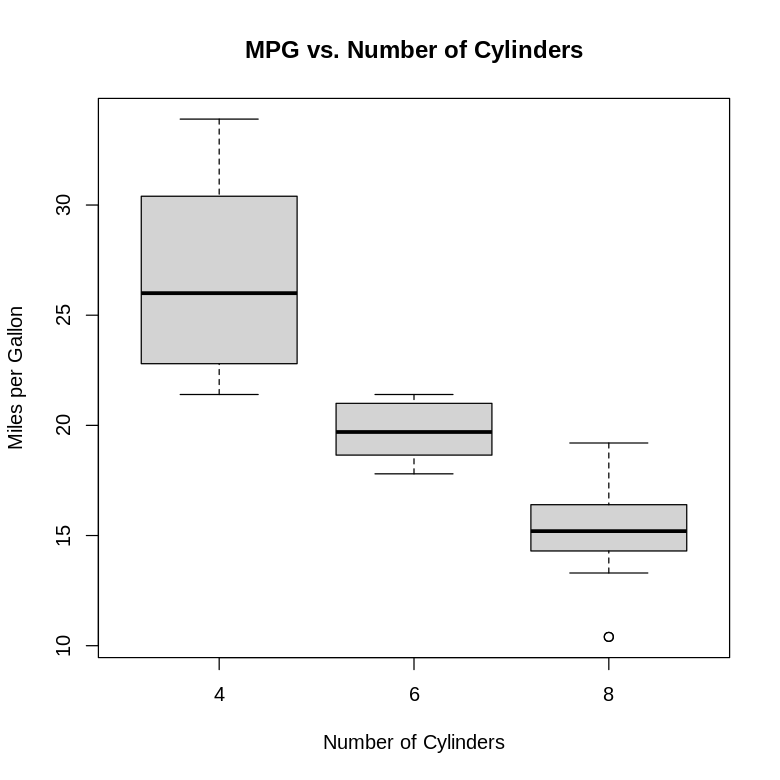

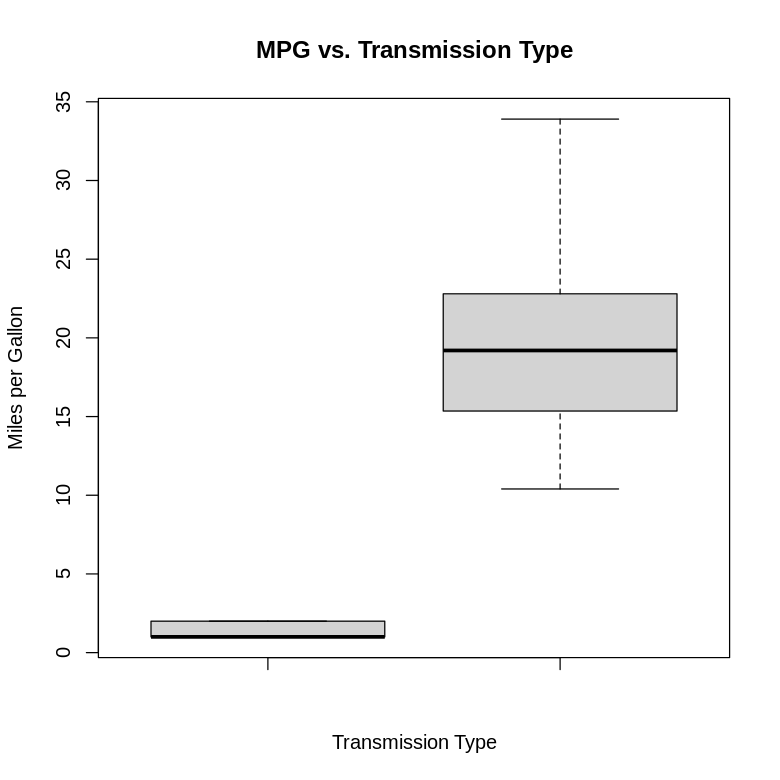

In [37]:
#1
mpg = mtcars$mpg
am = mtcars$am
mtcars$am = as.factor(am)
plot(cyl,mpg, xlab = "Number of Cylinders", ylab = "Miles per Gallon", main = "MPG vs. Number of Cylinders")
boxplot(am,mpg, xlab = "Transmission Type", ylab = "Miles per Gallon", main = "MPG vs. Transmission Type")

In [38]:
#2
fit_interaction = lm(mpg ~ cyl + am + cyl:am, data = mtcars)
summary(fit_interaction)


Call:
lm(formula = mpg ~ cyl + am + cyl:am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6750 -1.1000  0.1125  1.6875  5.8250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.900      1.751  13.081 6.06e-13 ***
cyl6          -3.775      2.316  -1.630 0.115155    
cyl8          -7.850      1.957  -4.011 0.000455 ***
am1            5.175      2.053   2.521 0.018176 *  
cyl6:am1      -3.733      3.095  -1.206 0.238553    
cyl8:am1      -4.825      3.095  -1.559 0.131069    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.032 on 26 degrees of freedom
Multiple R-squared:  0.7877,	Adjusted R-squared:  0.7469 
F-statistic: 19.29 on 5 and 26 DF,  p-value: 5.179e-08


**Model with Interaction**

$\hat y = 22.9 - 3.775cyl_{6} - 7.85cyl_{8} + 5.175am - 3.733am*cyl_{6} - 4.825am*cyl_{8}$

**Intercept Interpretation**

$\hat y = 22.9$ happens when $cyl_{6},cyl_{8},am = 0$ which is the average mpg for a car with an automatic transmission and 4 cylinders

**What is the average mpg for 6-cylinder cars with a manual transmission?**

$\hat y = 22.9 - 3.775(1) + 5.175 - 3.733(1)$

In [39]:
yhat_6_manual = 22.9 - 3.775 + 5.175 - 3.733
yhat_6_manual

[1] 20.567

In [40]:
#3
fit_interaction = lm(mpg ~ cyl + am + cyl:am, data = mtcars)
fit = lm(mpg ~ cyl + am, data = mtcars)
anova(fit, fit_interaction)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,264.4957,NA,NA,NA,NA
2,26,239.0592,2,25.43651,1.383233,0.268614


additing the interaction term decreases the SSE

In [41]:
#4
fit = lm(mpg ~ cyl + am, data = mtcars)
fit_reduced_1 = lm(mpg ~ cyl, data = mtcars) #only includes cyl
fit_reduced_2 = lm(mpg ~ am, data = mtcars) #only includes am
anova(fit_reduced_1,fit) #testing if am is significant


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,301.2626,NA,NA,NA,NA
2,28,264.4957,1,36.76692,3.892214,0.05845717


adding in the am variable decreased the SSE but not by a huge amount

In [42]:
anova(fit_reduced_2,fit) #testing if cyl is signiciant

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,720.8966,NA,NA,NA,NA
2,28,264.4957,2,456.4009,24.15772,8.010109e-07


adding in the cyl variable significantly decrease the SSE compared to the model with just am.

****

In [43]:
summary(fit_reduced_1)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2636 -1.8357  0.0286  1.3893  7.2364 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6636     0.9718  27.437  < 2e-16 ***
cyl6         -6.9208     1.5583  -4.441 0.000119 ***
cyl8        -11.5636     1.2986  -8.905 8.57e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.223 on 29 degrees of freedom
Multiple R-squared:  0.7325,	Adjusted R-squared:  0.714 
F-statistic:  39.7 on 2 and 29 DF,  p-value: 4.979e-09


**Final Model**


$\hat y = 26.6636 - 6.9208cyl_{6} - 11.5636cyl_{8}$


